In [2]:
import pandas as pd
import re
import numpy as np

/Users/shelbyjouppi/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [7]:
df = pd.read_csv("psychology-today-directory-2.csv")

In [8]:
df.finances.head(30)

0     \n\n\n\n\n\n\nAccepted Insurance Plans\n\n\n\n...
1     \n\n\n\nCost per Session: $225 - $375\n       ...
2     \n\n\n\nSliding Scale: Yes\n            \n\n\n...
3                                                  None
4     \n\n\n\nCost per Session: Up to $450\n        ...
5     \n\n\n\nCost per Session: $80 - $150\n        ...
6     \n\n\n\nCost per Session: $125 - $180\n       ...
7     \n\n\n\n\nPay By:\nAmerican Express, Cash, Che...
8     \n\n\n\nCost per Session: $100 - $150\n       ...
9     \n\n\n\nCost per Session: $200 - $500\n       ...
10    \n\n\n\nCost per Session: $275 - $375\n       ...
11    \n\n\n\nCost per Session: $200 - $350\n       ...
12    \n\n\n\nSliding Scale: Yes\n            \n\n\n...
13    \n\n\n\nCost per Session: $250 - $350\n       ...
14    \n\n\n\nCost per Session: $80 - $150\n        ...
15    \n\n\n\nCost per Session: $150 - $250\n       ...
16    \n\n\n\nCost per Session: $100 - $180\n       ...
17    \n\n\n\nCost per Session: $200 - $250\n   

In [9]:
def cost_per_session(finances):
    query = re.findall(r"Cost per Session:.*",finances)
    if len(query) > 0:
        return query[0]
    else:
        return None

In [10]:
df['cost_per_session'] = df.finances.apply(cost_per_session)

In [11]:
df.cost_per_session = df.cost_per_session.str.split(":").str[1]

In [12]:
df.head()

,url,name,title,phone,address,statement,verified,zip,finances,cost_per_session
0,https://www.psychologytoday.com/us/therapists/...,Ava Dorfman,"Psychologist, PhD",(929) 493-4920,"New York, NY 10003",I provide comprehensive neuropsychological eva...,Verified,10003,\n\n\n\n\n\n\nAccepted Insurance Plans\n\n\n\n...,None
1,https://www.psychologytoday.com/us/therapists/...,Michael D Schwalberg,"Psychologist, PhD",(646) 798-4154,"New York, NY 10065",Trained at a world renowned Anxiety Disorders ...,Verified,10065,\n\n\n\nCost per Session: $225 - $375\n ...,$225 - $375
2,https://www.psychologytoday.com/us/therapists/...,Melissa Chattman,"Clinical Social Work/Therapist, LCSW",(973) 363-2090,"New York, NY 10011",I believe that a positive and genuine therapeu...,Verified,10011,\n\n\n\nSliding Scale: Yes\n \n\n\n...,None
3,https://www.psychologytoday.com/us/therapists/...,Sarah Katz,PsyD,(347) 708-8290 x103,"New York, NY 10022","Sarah Katz, Psy.D., has extensive training in ...",NaN,10022,None,None
4,https://www.psychologytoday.com/us/therapists/...,Kyle William McEvoy,"Mental Health Counselor, MS, LMHC",(929) 226-6119,"New York, NY 10022",I am a License in Mental Health Counseling (LM...,Verified,10022,\n\n\n\nCost per Session: Up to $450\n ...,Up to $450


In [13]:
def cost_range(cost_per_session):
    if cost_per_session != None:
        query = re.findall(r"-",cost_per_session)
        if len(query) > 0:
            return cost_per_session
        else:
            return None
    else:
        return None

In [14]:
df['cost_range'] = df.cost_per_session.apply(cost_range)
df['cost_low'] = df.cost_range.str.split("-").str[0].str.replace("$","")
df['cost_high'] = df.cost_range.str.split("-").str[1].str.replace("$","")

/var/folders/_4/_njb58q944xdbv6xcbzbzmqh0000gn/T/ipykernel_17175/2216890866.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['cost_low'] = df.cost_range.str.split("-").str[0].str.replace("$","")
/var/folders/_4/_njb58q944xdbv6xcbzbzmqh0000gn/T/ipykernel_17175/2216890866.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['cost_high'] = df.cost_range.str.split("-").str[1].str.replace("$","")


In [15]:
df.head()

,url,name,title,phone,address,statement,verified,zip,finances,cost_per_session,cost_range,cost_low,cost_high
0,https://www.psychologytoday.com/us/therapists/...,Ava Dorfman,"Psychologist, PhD",(929) 493-4920,"New York, NY 10003",I provide comprehensive neuropsychological eva...,Verified,10003,\n\n\n\n\n\n\nAccepted Insurance Plans\n\n\n\n...,None,None,None,None
1,https://www.psychologytoday.com/us/therapists/...,Michael D Schwalberg,"Psychologist, PhD",(646) 798-4154,"New York, NY 10065",Trained at a world renowned Anxiety Disorders ...,Verified,10065,\n\n\n\nCost per Session: $225 - $375\n ...,$225 - $375,$225 - $375,225,375
2,https://www.psychologytoday.com/us/therapists/...,Melissa Chattman,"Clinical Social Work/Therapist, LCSW",(973) 363-2090,"New York, NY 10011",I believe that a positive and genuine therapeu...,Verified,10011,\n\n\n\nSliding Scale: Yes\n \n\n\n...,None,None,None,None
3,https://www.psychologytoday.com/us/therapists/...,Sarah Katz,PsyD,(347) 708-8290 x103,"New York, NY 10022","Sarah Katz, Psy.D., has extensive training in ...",NaN,10022,None,None,None,None,None
4,https://www.psychologytoday.com/us/therapists/...,Kyle William McEvoy,"Mental Health Counselor, MS, LMHC",(929) 226-6119,"New York, NY 10022",I am a License in Mental Health Counseling (LM...,Verified,10022,\n\n\n\nCost per Session: Up to $450\n ...,Up to $450,None,None,None


In [16]:
def cost_base(cost_per_session):
    if cost_per_session != None:
        query = re.findall(r"[+]",cost_per_session)
        if len(query) > 0:
            return cost_per_session
        else:
            return None
    else:
        return None

In [17]:
df['cost_base'] = df.cost_per_session.apply(cost_base).str.replace("$","").str.replace("[+]","")

/var/folders/_4/_njb58q944xdbv6xcbzbzmqh0000gn/T/ipykernel_17175/1782152690.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['cost_base'] = df.cost_per_session.apply(cost_base).str.replace("$","").str.replace("[+]","")
/var/folders/_4/_njb58q944xdbv6xcbzbzmqh0000gn/T/ipykernel_17175/1782152690.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['cost_base'] = df.cost_per_session.apply(cost_base).str.replace("$","").str.replace("[+]","")


In [18]:
df.tail()

,url,name,title,phone,address,statement,verified,zip,finances,cost_per_session,cost_range,cost_low,cost_high,cost_base
3220,https://www.psychologytoday.com/us/therapists/...,Rikki Shanberg,"Clinical Social Work/Therapist, LCSW",(929) 244-0454,"New York, NY 10065",I help parents and children in the NYC area em...,Verified,10065,\n\n\n\n\n\n\nAccepted Insurance Plans\n\n\n\n...,None,None,None,None,None
3221,https://www.psychologytoday.com/us/therapists/...,Edward Greenblatt,"Psychologist, PhD",(646) 760-1768,"Office is near: New York, NY 10028",Do you have a child or adolescent who has diff...,Verified,10028,\n\n\n\nSliding Scale: Yes\n \n\n\n...,None,None,None,None,None
3222,https://www.psychologytoday.com/us/therapists/...,Jennifer Musico,"Psychologist, PsyD",(646) 791-3175,"Office is near: New York, NY 10169",Once you have made the decision to seek therap...,Verified,10169,\n\n\n\nCost per Session: $350 - $500\n ...,$350 - $500,$350 - $500,350,500,None
3223,https://www.psychologytoday.com/us/therapists/...,Lois Raviv,"Clinical Social Work/Therapist, LCSW, MA",(516) 513-8705,"Office is near: New York, NY 10021",What is child therapy? Do children sit and ta...,NaN,10021,\n\n\n\nSliding Scale: Yes\n \n\n\n...,None,None,None,None,None
3224,https://www.psychologytoday.com/us/therapists/...,Growth Psychology P.C.,"Psychologist, PhD",(516) 272-4708,"Office is near: New York, NY 10021","Clark R. Goldstein, Ph.D., is the founder of G...",Verified,10021,None,None,None,None,None,None


In [19]:
def cost_limit(cost_per_session):
    if cost_per_session != None:
        query = re.findall(r"Up to", cost_per_session)
        if len(query) > 0:
            return cost_per_session
        else:
            return None
    else:
        return None

In [20]:
df['cost_limit'] = df.cost_per_session.apply(cost_limit).str.split("$").str[1]

In [21]:
df.head()

,url,name,title,phone,address,statement,verified,zip,finances,cost_per_session,cost_range,cost_low,cost_high,cost_base,cost_limit
0,https://www.psychologytoday.com/us/therapists/...,Ava Dorfman,"Psychologist, PhD",(929) 493-4920,"New York, NY 10003",I provide comprehensive neuropsychological eva...,Verified,10003,\n\n\n\n\n\n\nAccepted Insurance Plans\n\n\n\n...,None,None,None,None,None,None
1,https://www.psychologytoday.com/us/therapists/...,Michael D Schwalberg,"Psychologist, PhD",(646) 798-4154,"New York, NY 10065",Trained at a world renowned Anxiety Disorders ...,Verified,10065,\n\n\n\nCost per Session: $225 - $375\n ...,$225 - $375,$225 - $375,225,375,None,None
2,https://www.psychologytoday.com/us/therapists/...,Melissa Chattman,"Clinical Social Work/Therapist, LCSW",(973) 363-2090,"New York, NY 10011",I believe that a positive and genuine therapeu...,Verified,10011,\n\n\n\nSliding Scale: Yes\n \n\n\n...,None,None,None,None,None,None
3,https://www.psychologytoday.com/us/therapists/...,Sarah Katz,PsyD,(347) 708-8290 x103,"New York, NY 10022","Sarah Katz, Psy.D., has extensive training in ...",NaN,10022,None,None,None,None,None,None,None
4,https://www.psychologytoday.com/us/therapists/...,Kyle William McEvoy,"Mental Health Counselor, MS, LMHC",(929) 226-6119,"New York, NY 10022",I am a License in Mental Health Counseling (LM...,Verified,10022,\n\n\n\nCost per Session: Up to $450\n ...,Up to $450,None,None,None,None,450


In [22]:
df = df.astype({'cost_limit':'float','cost_high':'float','cost_low':'float','cost_base':'float'})

In [23]:
df['cost_base'] = df['cost_base'].fillna(0)
df['cost_limit'] = df['cost_limit'].fillna(0)
df['average_cost'] = (df.cost_low + df.cost_high)/2
df['average_cost'] = df['average_cost'].fillna(0)

In [24]:
df['average_cost'] = df.average_cost + df.cost_base + df.cost_limit

In [25]:
df.average_cost = df.average_cost.replace(0,np.nan)

In [26]:
df.average_cost.mean()

190.502689376961

In [36]:
df[(df.cost_high < 1000) & (df.title.str.contains("psychologist",case=False))].average_cost.mean()

235.77777777777777

In [37]:
df[(df.cost_high < 1000)].average_cost.mean()

185.3955792682927

<AxesSubplot:>

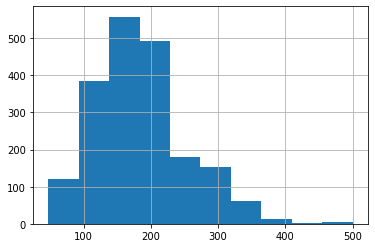

In [39]:
df[(df.cost_high < 1000)].average_cost.hist()

In [42]:
df[(df.cost_high < 1000)].to_csv("psychologists-costs-clean.csv",index=False)

In [60]:
df[(df.cost_high < 1000)].drop_duplicates(subset='url').average_cost.mean()

186.08654545454544

In [61]:
df[(df.cost_high < 1000)].drop_duplicates(subset='url').average_cost.mean()

count    1375.000000
mean      186.086545
std        66.577688
min        47.500000
25%       137.500000
50%       175.000000
75%       225.000000
max       500.000000
Name: average_cost, dtype: float64

In [62]:
df[(df.cost_high < 1000)& (df.title.str.contains("psychologist",case=False))].drop_duplicates(subset='url').average_cost.describe()

count    315.000000
mean     235.203175
std       65.044338
min       65.000000
25%      186.250000
50%      225.000000
75%      275.000000
max      462.500000
Name: average_cost, dtype: float64

In [68]:
costs = df[(df.cost_high < 1000)].drop_duplicates(subset='url').average_cost.to_frame()

In [69]:
costs['therapists'] = "therapists"

In [71]:
costs

,average_cost,therapists
1,300.0,therapists
5,115.0,therapists
6,152.5,therapists
8,125.0,therapists
9,350.0,therapists
...,...,...
2799,162.5,therapists
2806,112.5,therapists
2814,125.0,therapists
2823,102.5,therapists


In [111]:
from plotnine import *
import matplotlib.pyplot as plt
from plotnine import *
plt.rcParams['svg.fonttype'] = 'none'

/Users/shelbyjouppi/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/geoms/geom_point.py:61: UserWarning: You passed a edgecolor/edgecolors (['#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#0

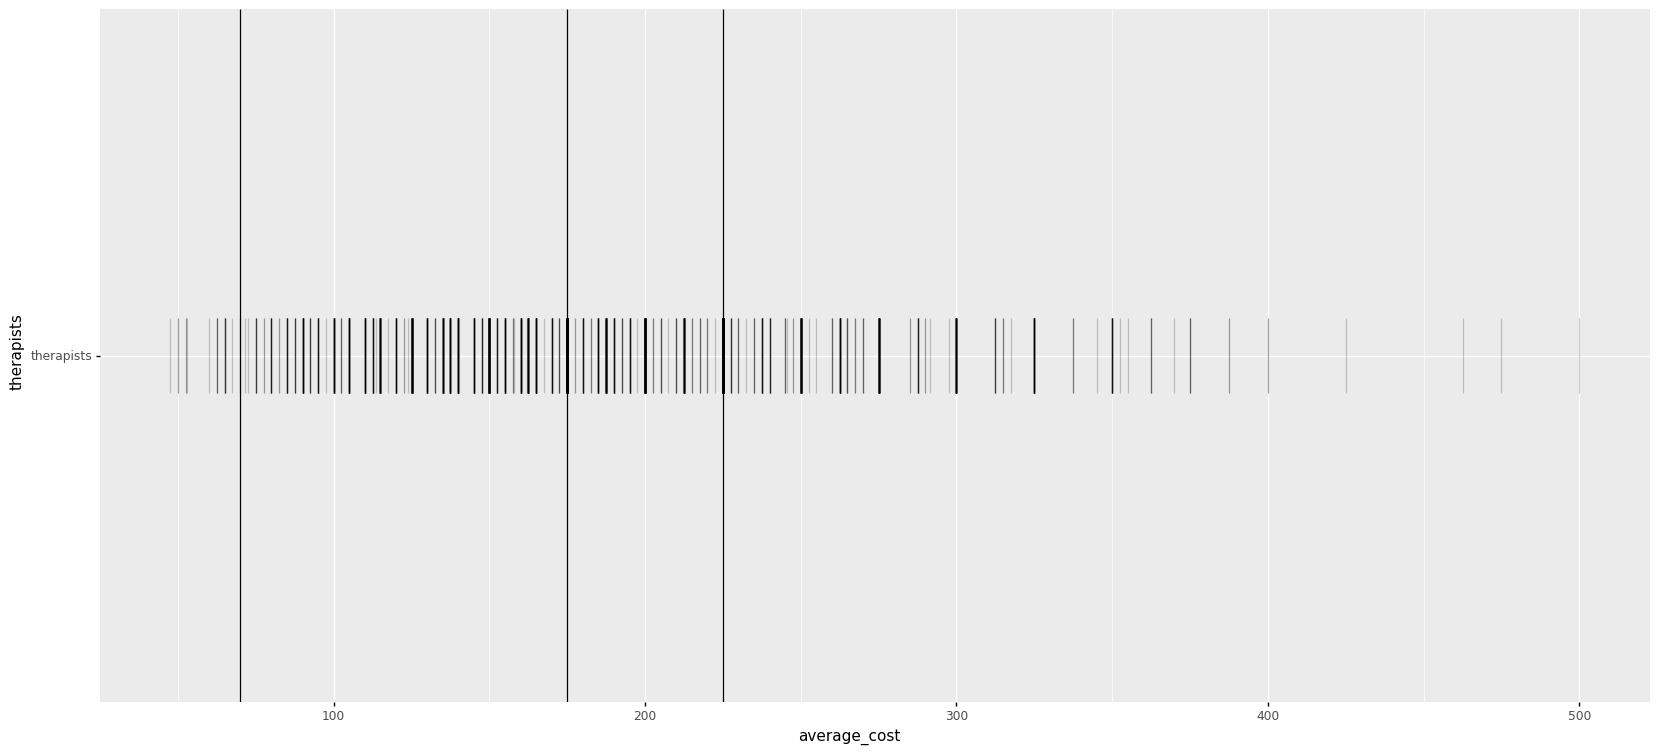

<ggplot: (330669665)>

In [112]:
chart = (
    ggplot(costs, aes(x='average_cost',y="therapists"))
        + geom_point(alpha=.2,size=30,shape='|')
        + geom_vline(aes(xintercept=70))
        + geom_vline(aes(xintercept=175))
        + geom_vline(aes(xintercept=225))
        + theme(figure_size=(20,9))
        
)
chart

In [113]:
chart.save('average_costs.svg')

/Users/shelbyjouppi/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 20 x 9 in image.
/Users/shelbyjouppi/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: average_costs.svg
/Users/shelbyjouppi/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/geoms/geom_point.py:61: UserWarning: You passed a edgecolor/edgecolors (['#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#00000033', '#

In [58]:
df[(df.cost_high < 1000)].sort_values('cost_low')

,url,name,title,phone,address,statement,verified,zip,finances,cost_per_session,cost_range,cost_low,cost_high,cost_base,cost_limit,average_cost
1096,https://www.psychologytoday.com/us/therapists/...,The Child & Family Institute,"Psychologist, PhD",(914) 265-2066,"New York, NY 10017","Hi, I'm Dr. Adam Weissman, Founder, Director, ...",Verified,10017,\n\n\n\nCost per Session: $5 - $450\n ...,$5 - $450,$5 - $450,5.0,450.0,0.0,0.0,227.5
3025,https://www.psychologytoday.com/us/therapists/...,The Child & Family Institute,"Psychologist, PhD",(914) 265-2066,"Office is near: Brooklyn, NY 11237","Hi, I'm Dr. Adam Weissman, Founder, Director, ...",Verified,11237,\n\n\n\nCost per Session: $5 - $450\n ...,$5 - $450,$5 - $450,5.0,450.0,0.0,0.0,227.5
1976,https://www.psychologytoday.com/us/therapists/...,The Child & Family Institute,"Psychologist, PhD",(914) 265-2066,"Office is near: Brooklyn, NY 11237","Hi, I'm Dr. Adam Weissman, Founder, Director, ...",Verified,11237,\n\n\n\nCost per Session: $5 - $450\n ...,$5 - $450,$5 - $450,5.0,450.0,0.0,0.0,227.5
1357,https://www.psychologytoday.com/us/therapists/...,Ingrid Ma,LPC Intern,(516) 217-3899,"Office is near: New York, NY 10069",Ingrid Ma is a mental health counselor practic...,Verified,10069,\n\n\n\nCost per Session: $5 - $100\n ...,$5 - $100,$5 - $100,5.0,100.0,0.0,0.0,52.5
2072,https://www.psychologytoday.com/us/therapists/...,Alicia Boykin,LPC Intern,(516) 217-0952,"Office is near: Brooklyn, NY 11231",Alicia Boykin began her studies in Behavioral ...,Verified,11231,\n\n\n\nCost per Session: $5 - $100\n ...,$5 - $100,$5 - $100,5.0,100.0,0.0,0.0,52.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3222,https://www.psychologytoday.com/us/therapists/...,Jennifer Musico,"Psychologist, PsyD",(646) 791-3175,"Office is near: New York, NY 10169",Once you have made the decision to seek therap...,Verified,10169,\n\n\n\nCost per Session: $350 - $500\n ...,$350 - $500,$350 - $500,350.0,500.0,0.0,0.0,425.0
209,https://www.psychologytoday.com/us/therapists/...,Cindy L Breitman,"Psychologist, PhD, ABPP-CN",(646) 386-2194 x301,"New York, NY 10018",I am a board certified clinical neuropsycholog...,Verified,10018,\n\n\n\nCost per Session: $375 - $550\n ...,$375 - $550,$375 - $550,375.0,550.0,0.0,0.0,462.5
617,https://www.psychologytoday.com/us/therapists/...,Amy Pizer,"Clinical Social Work/Therapist, PhD",(646) 386-2272,"New York, NY 10021",I have over twenty-five years of experience in...,Verified,10021,\n\n\n\nCost per Session: $400 - $600\n ...,$400 - $600,$400 - $600,400.0,600.0,0.0,0.0,500.0
3049,https://www.psychologytoday.com/us/therapists/...,Amy Pizer,"Clinical Social Work/Therapist, PhD",(646) 386-2272,"Office is near: New York, NY 10028",I have over twenty-five years of experience in...,Verified,10028,\n\n\n\nCost per Session: $400 - $600\n ...,$400 - $600,$400 - $600,400.0,600.0,0.0,0.0,500.0


In [51]:
df[(df.cost_high < 1000)].groupby("zip").name.nunique().to_frame().reset_index().merge(df[(df.cost_high < 1000)].groupby("zip").average_cost.mean().round().to_frame().reset_index(),how='left',left_on="zip",right_on='zip').to_csv("providers-zip-average-costs.csv",index=False)

In [ ]:
df[(df.cost_high < 1000)].groupby("zip")

In [242]:
def sliding_scale(finances):
    query = re.findall(r"Sliding Scale:.*",finances)
    if len(query) > 0:
        return query[0]
    else:
        return None

In [87]:
df['sliding_scale'] = df.finances.apply(sliding_scale)

In [88]:
df.sliding_scale = df.sliding_scale.str.split(":").str[1]

 150     80
 200     48
 100     33
 250     33
 175     22
         ..
 165+     1
 235+     1
 35       1
 30       1
 235      1
Name: cost_low, Length: 71, dtype: int64

In [64]:
def accepted_insurance(finances):
    query = re.findall(r"Accepted Insurance Plans",finances)
    if len(query) > 0:
        return 'Yes'
    else:
        return None

In [65]:
df['insurance_plans'] = df.finances.apply(accepted_insurance)

In [79]:
for finance in df.finances:
    print(finance)








Accepted Insurance Plans



                                                            Out of Network
                                                    






                            I provide a detailed receipt of services rendered with all appropriate CPT codes that can be submitted for out-of-network reimbursement.
                
Email me or call (929) 493-4920 with questions.
                                    

 




Cost per Session: $225 - $375
            

Sliding Scale: Yes
            


Pay By:
Cash, Check





 




Sliding Scale: Yes
            


Pay By:
ACH Bank transfer, American Express, Cash, Check, Discover, Health Savings Account, Mastercard, Paypal, Venmo, Visa, Wire




Accepted Insurance Plans



                                                            Aetna
                                                    

                                                            Cigna and Evernorth
                                                    